Simulating real-time ECG filtering...


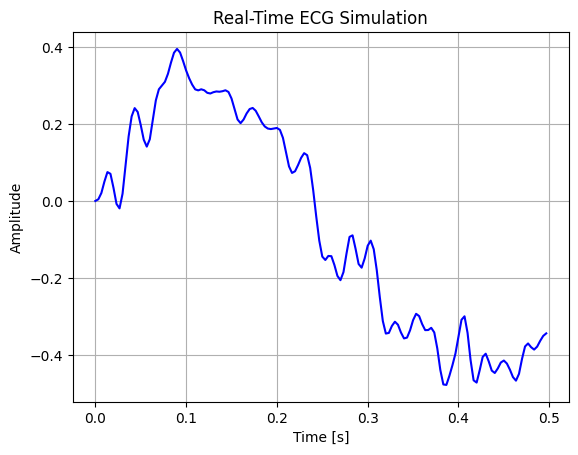

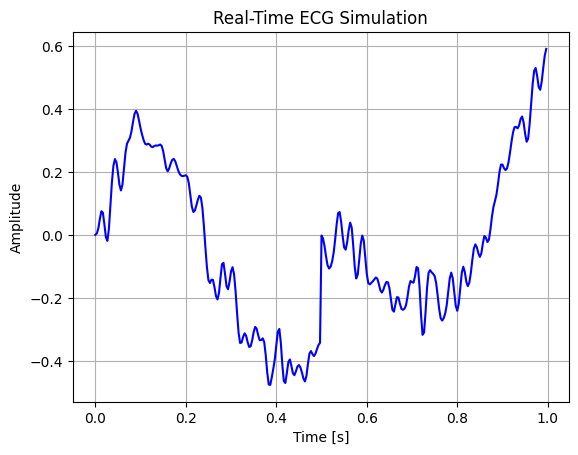

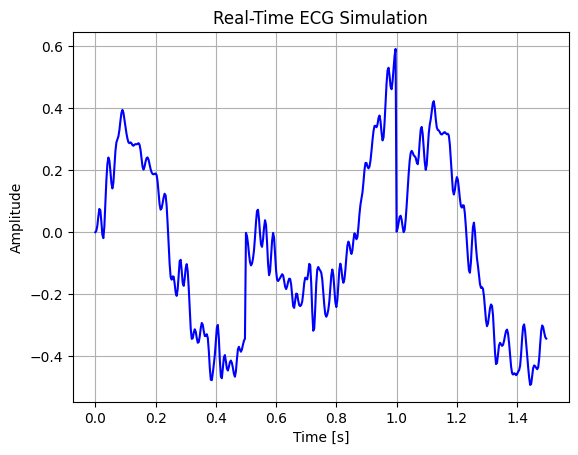

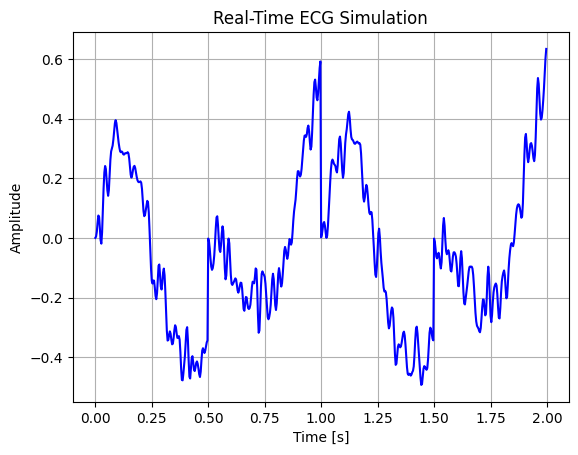

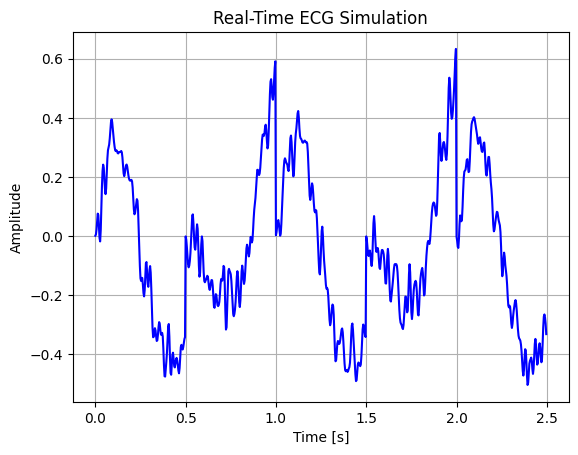

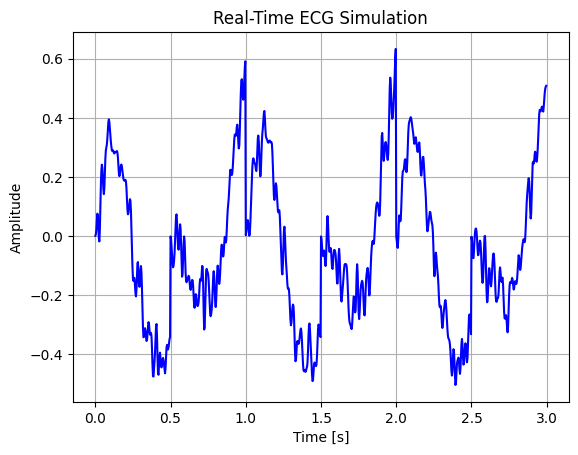

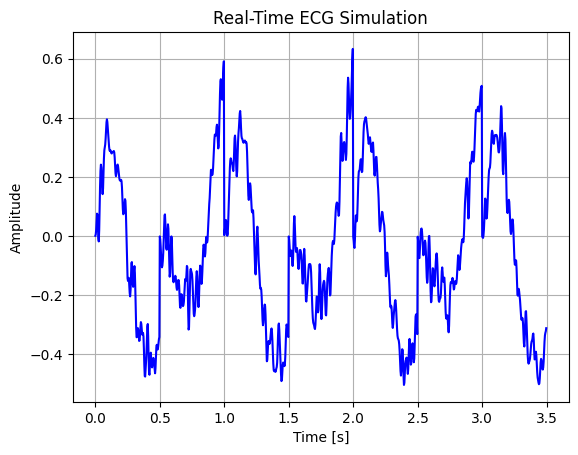

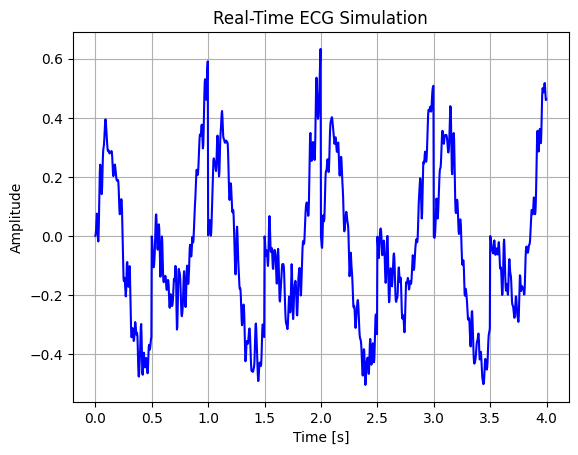

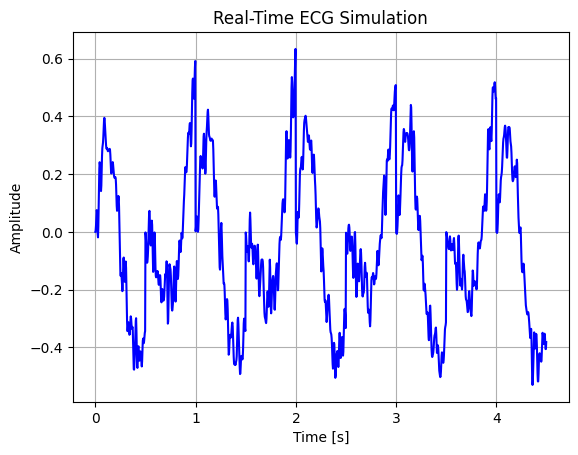

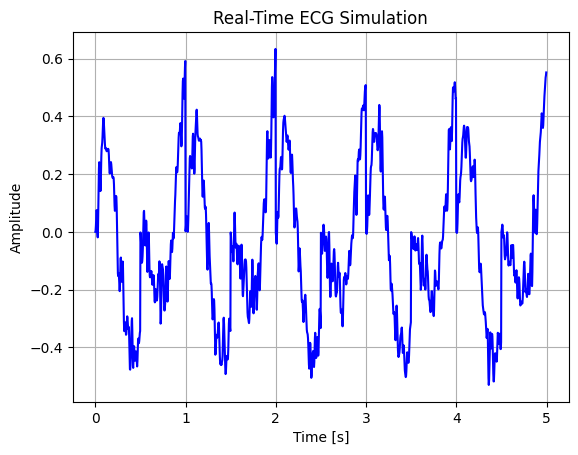

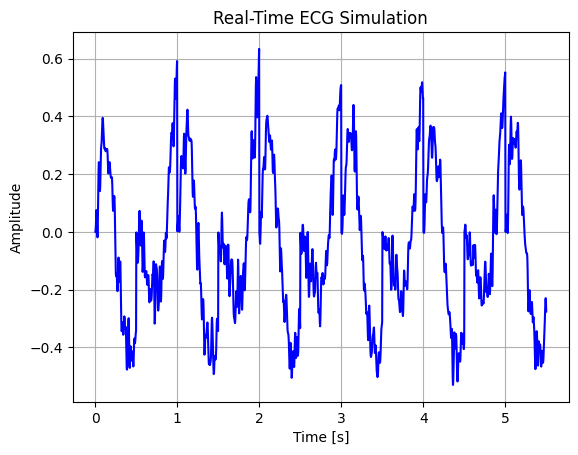

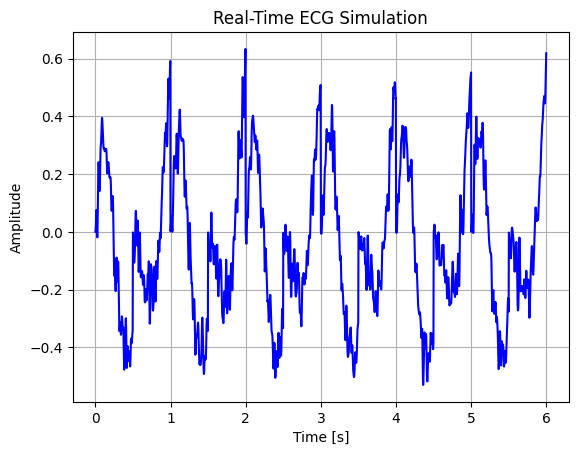

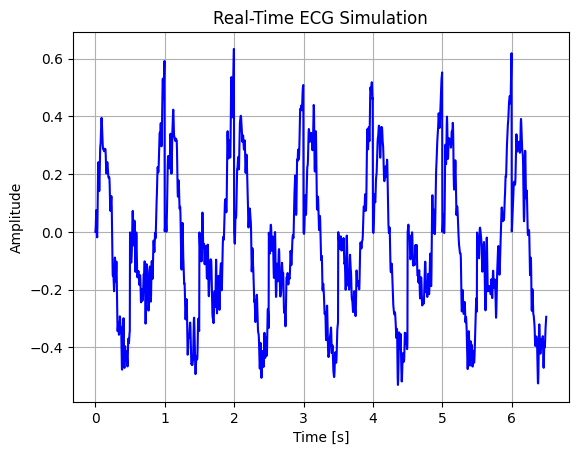

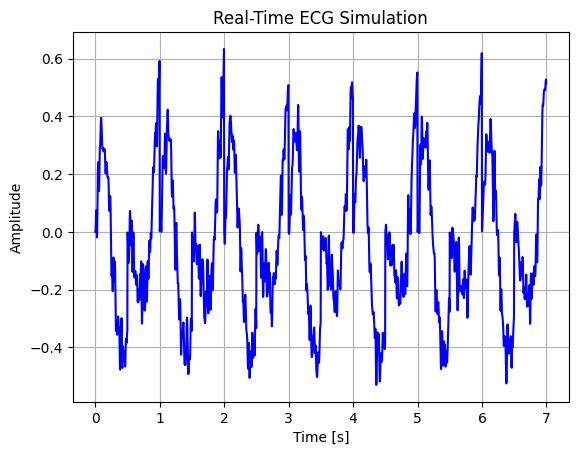

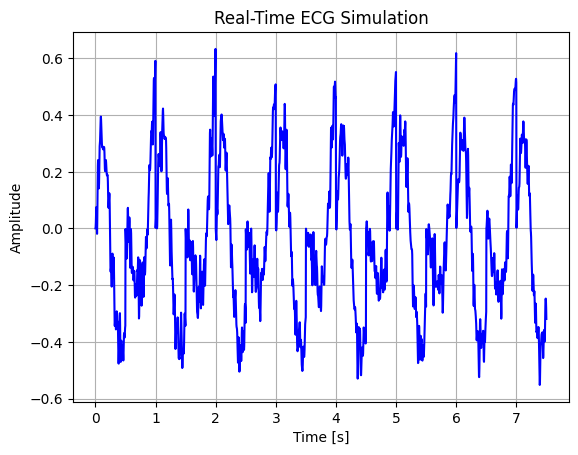

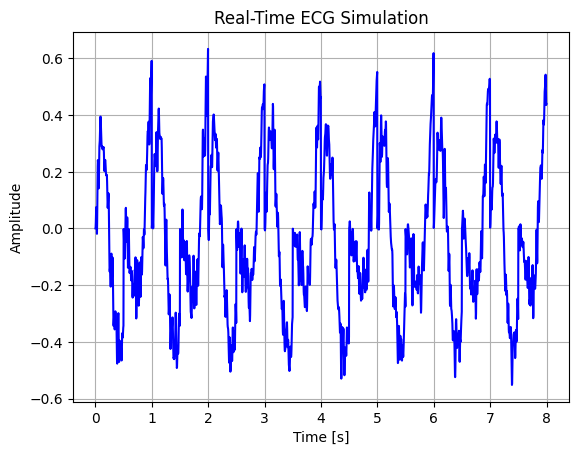

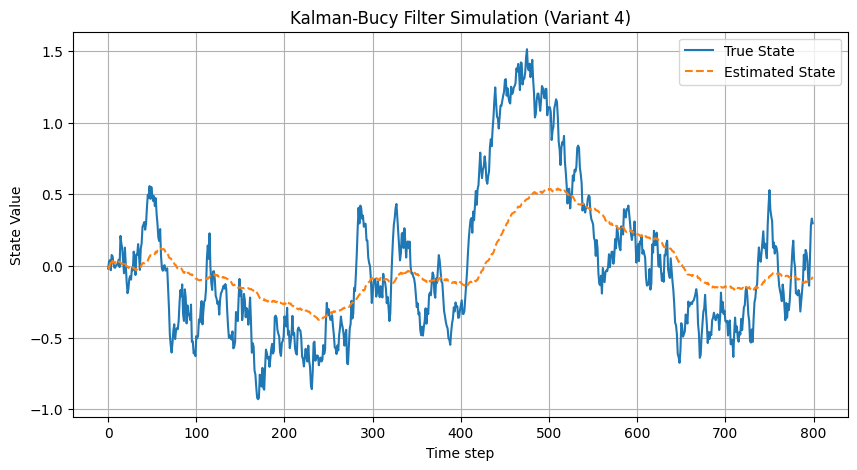

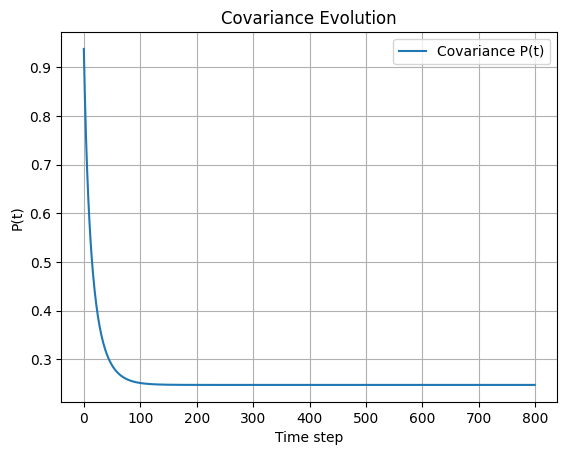

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import butter, lfilter

# -----------------------------
# Part A: Real-Time ECG Simulation
# -----------------------------

# 1. Generate a synthetic ECG signal
def synthetic_ecg(fs, duration, heart_rate=60):
    t = np.linspace(0, duration, int(fs * duration))
    ecg = 0.6 * np.sin(2 * np.pi * heart_rate / 60 * t) \
        + 0.2 * np.sin(2 * np.pi * 2 * heart_rate / 60 * t) \
        + 0.1 * np.random.randn(len(t))  # Add noise
    return t, ecg

# 2. Apply bandpass filter (0.5 Hz - 40 Hz)
def bandpass_filter(signal, fs, lowcut=0.5, highcut=40.0, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, signal)

# 3. Simulate real-time processing block-by-block
def simulate_real_time_processing(ecg_signal, fs, block_size=150):
    total_samples = len(ecg_signal)
    num_blocks = total_samples // block_size
    delay = block_size / fs

    processed_signal = []
    t_axis = []

    print("Simulating real-time ECG filtering...")

    plt.ion()  # Enable interactive mode

    for i in range(num_blocks):
        block = ecg_signal[i*block_size:(i+1)*block_size]
        filtered = bandpass_filter(block, fs)
        processed_signal.extend(filtered)
        t_axis.extend(np.arange(i*block_size, (i+1)*block_size) / fs)

        # Live plot
        plt.clf()
        plt.plot(t_axis, processed_signal, label="Filtered ECG", color='blue')
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.title("Real-Time ECG Simulation")
        plt.grid(True)
        plt.pause(0.01)
        time.sleep(delay)

    plt.ioff()
    plt.show()

# --- Run ECG simulation ---
fs = 300           # Sampling frequency in Hz
duration = 8       # Duration in seconds
block_size = 150   # Block size in samples

t, ecg = synthetic_ecg(fs, duration)
simulate_real_time_processing(ecg, fs, block_size)

# -----------------------------
# Part B: Kalman-Bucy Filtering
# -----------------------------

# Simulation parameters
dt = 0.01
T = 8                  # Duration to match ECG
N = int(T / dt)

# Kalman-Bucy filter parameters (from Variant 4)
A = -1
C = 1
Q = 0.8
R = 0.2
P = 1.0

# Initial states
x_true = 0.0
x_hat = 0.0

# History lists for plotting
x_history = []
xhat_history = []
P_history = []

# Simulation loop
for k in range(N):
    # True system evolution with process noise
    w = np.random.normal(0, np.sqrt(Q * dt))
    x_true += dt * (A * x_true) + w

    # Measurement with observation noise
    v = np.random.normal(0, np.sqrt(R))
    y = C * x_true + v

    # Kalman gain
    K = P * C / R

    # Estimate update
    x_hat += dt * (A * x_hat + K * (y - C * x_hat))

    # Covariance update
    P += dt * (2 * A * P + Q - K * C * P)

    # Store history
    x_history.append(x_true)
    xhat_history.append(x_hat)
    P_history.append(P)

# Plotting the true vs estimated state
plt.figure(figsize=(10, 5))
plt.plot(x_history, label="True State")
plt.plot(xhat_history, label="Estimated State", linestyle="--")
plt.title("Kalman-Bucy Filter Simulation (Variant 4)")
plt.xlabel("Time step")
plt.ylabel("State Value")
plt.grid(True)
plt.legend()
plt.show()

# Optional: Plot the covariance evolution
plt.figure()
plt.plot(P_history, label="Covariance P(t)")
plt.title("Covariance Evolution")
plt.xlabel("Time step")
plt.ylabel("P(t)")
plt.grid(True)
plt.legend()
plt.show()
